In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [122]:
#Importing the dataset
df= pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the given dataset.

In [124]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We see that the Survived is our target variable which of the type int.
Name, Cabin , Embarked and Gender are categorical variables while the rest are int or float type variables.

In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that Age and Cabin have more missing values and hence can not be ignored.
Let us fill the age with Median for now.

In [127]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [128]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since Cabin of many passesngers are not known, let us impute it with Not Known(NK) so that it acts as another category to the variable.

In [129]:
df['Cabin'] = df['Cabin'].fillna('NK')

In [130]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [131]:
df['Embarked'] = df['Embarked'].fillna('S')

In [132]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NK,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NK,C


In [133]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'survived count'}, xlabel='Survived', ylabel='count'>

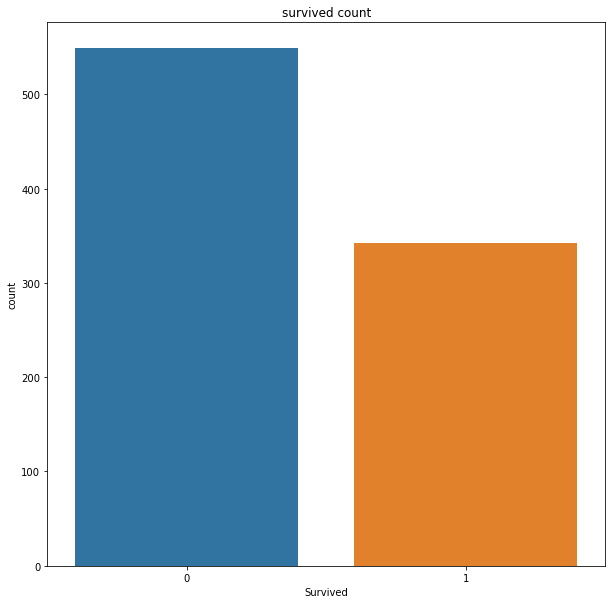

In [134]:
plt.figure(figsize=(10,10))
plt.title('survived count')
sn.countplot(df['Survived'])

We that the there is not too much imbalance in the survived variable

In [135]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Survived is the target variable and the rest are feature variables.

In [136]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NK,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NK,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NK,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NK,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NK,C


In [137]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

We see that the Passenger Id and Name is unique for all the rows, therefore it can not have any impact on the target variable.
We can drop these two columns

In [138]:
df = df.drop(['PassengerId','Name'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NK,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NK,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NK,S


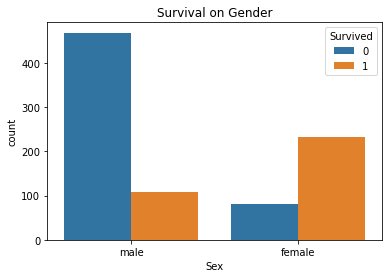

In [139]:
sn.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival on Gender")
plt.show()

We see that the Being a Female there are more number of chances to be survive

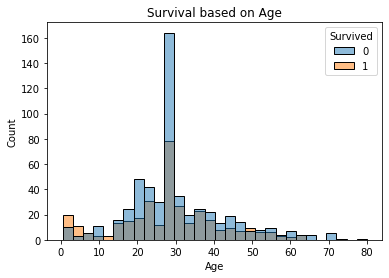

In [140]:
sn.histplot(x="Age", hue="Survived", data=df)
plt.title("Survival based on Age")
plt.show()

We see that people around the age of 30 have survived the most.
Less number of people above the age of 50 have survived

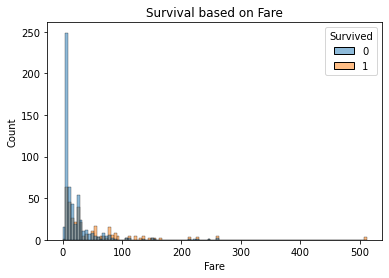

In [141]:
sn.histplot(x="Fare", hue="Survived", data=df)
plt.title("Survival based on Fare")
plt.show()

We see that more number of people with minimum fare did not survive

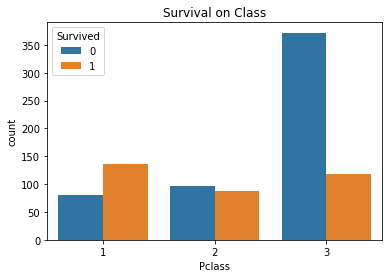

In [142]:
sn.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival on Class")
plt.show()

We see that the Pclass 1 has the maximum chances to survive while Pclass 3 has the minimum number of people survive.

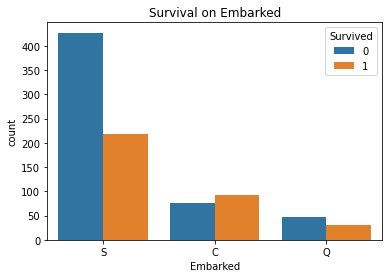

In [143]:
sn.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival on Embarked")
plt.show()

We see that the less than 50% of the people who embarked from Southampton have survived.
We see that the more than 50% of the people who embarked from Cherbourg have survived.
We that the survival rate of the people who embarked from Queenstown is arounf 30-40%.

In [144]:
cor=df.corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<AxesSubplot:>

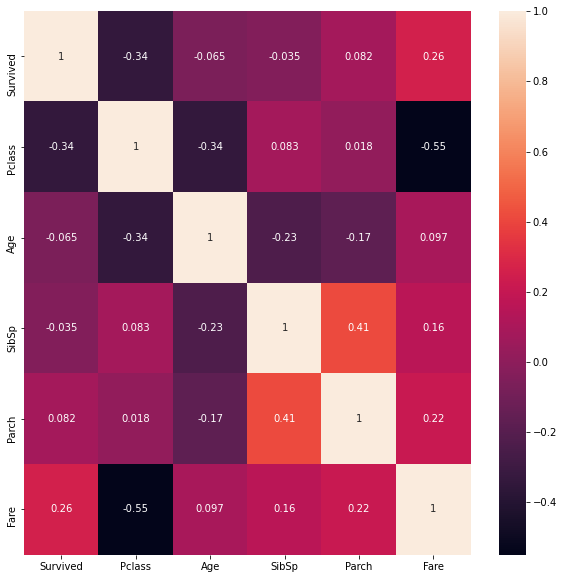

In [145]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

We see that all the remaining features moderately correlated and have a significant impact on the target variable Survived.

Let us now split the data into feature variables and the target variables.

In [146]:
y = df['Survived']
x = df.drop(['Survived'],axis = 1)

In [147]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [148]:
from sklearn.preprocessing import OneHotEncoder

x_scaled = OneHotEncoder().fit_transform(x)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=42)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Building all the models and getting the classification for each of them

In [152]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       134
           1       0.73      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[111,  23],
       [ 26,  63]], dtype=int64)

In [155]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       134
           1       0.79      0.69      0.73        89

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [156]:
confusion_matrix(y_test,y_pred)

array([[118,  16],
       [ 28,  61]], dtype=int64)

In [157]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



In [158]:
confusion_matrix(y_test,y_pred)

array([[117,  17],
       [ 24,  65]], dtype=int64)

In [159]:
maxaccu =0
maxrs = 0
for i in range(1,200):
    mod = LogisticRegression(random_state=i)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.8161434977578476 on random state  1


In [160]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.76      0.73      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [161]:
confusion_matrix(y_test,y_pred)

array([[113,  21],
       [ 24,  65]], dtype=int64)

In [162]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       134
           1       0.68      0.73      0.70        89

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.76      0.75      0.75       223



In [163]:
confusion_matrix(y_test,y_pred)

array([[103,  31],
       [ 24,  65]], dtype=int64)

In [167]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       134
           1       0.86      0.64      0.74        89

    accuracy                           0.82       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



In [168]:
confusion_matrix(y_test,y_pred)

array([[125,   9],
       [ 32,  57]], dtype=int64)

In [169]:
from sklearn.model_selection import cross_val_score

In [172]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.8058690603226413


In [173]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.8249199673592369


In [174]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.8237963718536185


In [176]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.7878915322327538


In [178]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.7531291193270981


In [179]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.8114242671520934


In [181]:
from sklearn import metrics

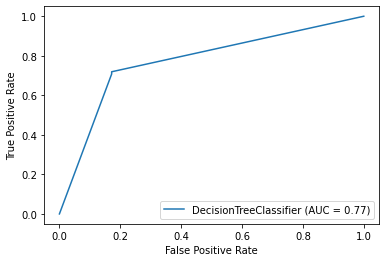

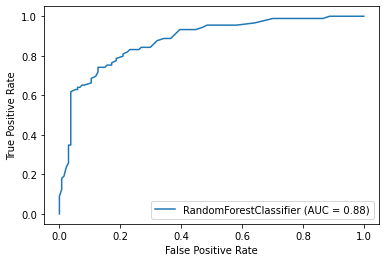

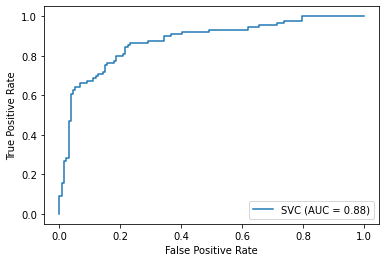

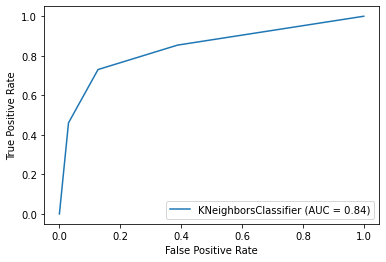

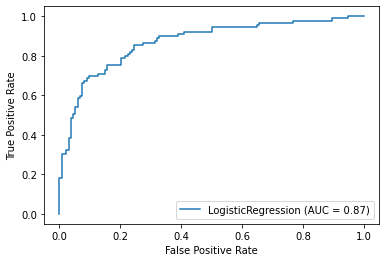

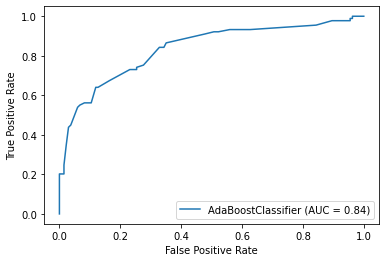

In [182]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

We see that the Random Forest Classifier has the minimum difference with cv score with AUC=0.88.
Therefore we can consider it our best model.

<b>Hyperparamter Tuning<b>

In [183]:
from sklearn.model_selection import GridSearchCV

In [219]:
parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }


In [223]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [224]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [225]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 29, 'max_features': 'auto'}

In [226]:
Final_mod = RandomForestClassifier(criterion='entropy',max_depth=29,max_features='auto')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

80.26905829596413


In [227]:
confusion_matrix(y_test,pred)

array([[119,  15],
       [ 29,  60]], dtype=int64)

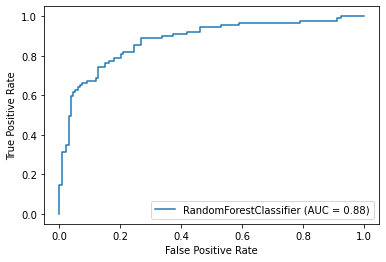

In [228]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b>Serialization<b>

In [229]:
import joblib
joblib.dump(Final_mod,"TitanicSurvival.pkl")

['TitanicSurvival.pkl']